In [1]:
from google.colab import files
uploaded = files.upload("googleplaystore.csv")


Saving googleplaystore.csv to googleplaystore.csv/googleplaystore.csv


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

In [57]:
googleplaystore = list(uploaded.keys())[0]
df = pd.read_csv(googleplaystore)



In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [59]:
df = df.drop_duplicates()

In [60]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [61]:
df.Reviews

,Reviews
0,159
1,967
2,87510
3,215644
4,967
...,...
10836,38
10837,4
10838,3
10839,114


In [62]:
df.reset_index(drop = True, inplace=True)

In [63]:
df[~df['Reviews'].astype(str).str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [64]:
df=df.drop(df.index[9990])

In [65]:
df['Reviews']=df['Reviews'].astype(int)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [67]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [68]:
def size_process(item):
    if str(item)[-1] == 'M':
        res = float(str(item).replace('M', ''))
        res = res*1024
        return res
    elif str(item)[-1] == 'k':
        res = float(str(item).replace('k', ''))
        return res
    else:
        return str(np.NaN)

In [69]:
df['Size']=df['Size'].apply(size_process)

In [70]:
df['Size']

,Size
0,19456.0
1,14336.0
2,8908.8
3,25600.0
4,2867.2
...,...
10353,54272.0
10354,3686.4
10355,9728.0
10356,nan


In [71]:
df['Size'] = df['Size'].astype('float')

In [72]:
df['Size'].dtype

dtype('float64')

In [73]:
df.dropna(subset=['Size'], inplace=True)

In [74]:
df['Size'].count()

8831

In [75]:
df['Installs']=df['Installs'].str.replace('+','').str.replace(',','')

In [76]:
df['Installs']=df['Installs'].astype(int)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8831 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8831 non-null   object 
 1   Category        8831 non-null   object 
 2   Rating          7424 non-null   float64
 3   Reviews         8831 non-null   int64  
 4   Size            8831 non-null   float64
 5   Installs        8831 non-null   int64  
 6   Type            8831 non-null   object 
 7   Price           8831 non-null   object 
 8   Content Rating  8831 non-null   object 
 9   Genres          8831 non-null   object 
 10  Last Updated    8831 non-null   object 
 11  Current Ver     8823 non-null   object 
 12  Android Ver     8829 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 965.9+ KB


In [78]:
df["Price"].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$13.99', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99',
       '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96',
       '$19.40', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60',
       '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99',
       '$3.61', '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [79]:
df["Price"]=df["Price"].str.replace("$","")

In [80]:
df['Price']=df["Price"].astype(float)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8831 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8831 non-null   object 
 1   Category        8831 non-null   object 
 2   Rating          7424 non-null   float64
 3   Reviews         8831 non-null   int64  
 4   Size            8831 non-null   float64
 5   Installs        8831 non-null   int64  
 6   Type            8831 non-null   object 
 7   Price           8831 non-null   float64
 8   Content Rating  8831 non-null   object 
 9   Genres          8831 non-null   object 
 10  Last Updated    8831 non-null   object 
 11  Current Ver     8823 non-null   object 
 12  Android Ver     8829 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 965.9+ KB


In [82]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [83]:
df["Day"]=df["Last Updated"].dt.day
df["Month"]=df["Last Updated"].dt.month
df["Year"]=df["Last Updated"].dt.year

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8831 entries, 0 to 10357
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8831 non-null   object        
 1   Category        8831 non-null   object        
 2   Rating          7424 non-null   float64       
 3   Reviews         8831 non-null   int64         
 4   Size            8831 non-null   float64       
 5   Installs        8831 non-null   int64         
 6   Type            8831 non-null   object        
 7   Price           8831 non-null   float64       
 8   Content Rating  8831 non-null   object        
 9   Genres          8831 non-null   object        
 10  Last Updated    8831 non-null   datetime64[ns]
 11  Current Ver     8823 non-null   object        
 12  Android Ver     8829 non-null   object        
 13  Day             8831 non-null   int32         
 14  Month           8831 non-null   int32         
 15  Year    

In [85]:
df.drop('Last Updated', axis=1, inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8831 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8831 non-null   object 
 1   Category        8831 non-null   object 
 2   Rating          7424 non-null   float64
 3   Reviews         8831 non-null   int64  
 4   Size            8831 non-null   float64
 5   Installs        8831 non-null   int64  
 6   Type            8831 non-null   object 
 7   Price           8831 non-null   float64
 8   Content Rating  8831 non-null   object 
 9   Genres          8831 non-null   object 
 10  Current Ver     8823 non-null   object 
 11  Android Ver     8829 non-null   object 
 12  Day             8831 non-null   int32  
 13  Month           8831 non-null   int32  
 14  Year            8831 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 1000.4+ KB


In [87]:
df['Current Ver']=df['Current Ver'].str.replace("Varies with device","")

In [88]:
df['Android Ver'] = df['Android Ver'].str.replace("and up", "").str.replace("Varies with device","")

In [89]:
df[df.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
261,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35840.0,100000000,Free,0.0,Everyone,Business,9.7.14188,4.1,2,8,2018
349,imo free video calls and chat,COMMUNICATION,4.3,4785988,11264.0,500000000,Free,0.0,Everyone,Communication,9.8.000000010501,4.0,8,6,2018
372,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36893,4096.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0,6,7,2018
382,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648480,3379.2,100000000,Free,0.0,Teen,Communication,11.4.0,4.0,18,7,2018
383,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40960.0,500000000,Free,0.0,Teen,Communication,12.8.5.1121,4.0,2,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164,Podcast App: Free & Offline Podcasts by Player FM,NEWS_AND_MAGAZINES,4.6,66407,19456.0,1000000,Free,0.0,Teen,News & Magazines,4.1.0.72,4.0,25,7,2018
10233,FarmersOnly Dating,DATING,3.0,1145,1433.6,100000,Free,0.0,Mature 17+,Dating,2.2,4.0,25,2,2016
10238,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4096.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0,6,7,2018
10248,FP Notebook,MEDICAL,4.5,410,61440.0,50000,Free,0.0,Everyone,Medical,2.1.0.372,4.4,24,3,2018


In [91]:
df.drop_duplicates(subset=['App'], keep='first', inplace=True)


In [94]:
categorical_features=[features for features in df.columns if df[features].dtype == 'object']

In [95]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [96]:
numerical_features=[features for features in df.columns if df[features].dtype != 'object']

In [97]:
numerical_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [98]:
df[categprical_features]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,FR Forms,BUSINESS,NaN,0,9830.4,10,Free,0.0,Everyone,Business,1.1.5,4.0,29,9,2016
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1,25,7,2017
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,1.0,4.1,6,7,2018
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2,20,1,2017


In [101]:
df["Type"].value_counts(normalize=True)*100

,proportion
Type,
Free,91.878112
Paid,8.121888


In [102]:
for col in categorical_features:
    print(f"{col} : {df[col].value_counts(normalize = True)*100}")

App : App
Photo Editor & Candy Camera & Grid & ScrapBook    0.011857
CQ Key                                            0.011857
Curio Quest                                       0.011857
CQ                                                0.011857
CQ Hotels                                         0.011857
                                                    ...   
DJMAX TECHNIKA Q - Music Game                     0.011857
Q-Ticketing                                       0.011857
Q Remote Control                                  0.011857
Leica Q                                           0.011857
iHoroscope - 2018 Daily Horoscope & Astrology     0.011857
Name: proportion, Length: 8434, dtype: float64
Category : Category
FAMILY                 20.464785
GAME                   10.350960
TOOLS                   8.679156
BUSINESS                4.458146
MEDICAL                 4.375148
PERSONALIZATION         4.161726
LIFESTYLE               3.960161
FINANCE                 3.545174
PRODUCTIVI

In [103]:
df["Android Ver"].value_counts(normalize = True)*100

,proportion
Android Ver,
4.1,24.940702
4.0.3,16.117173
4.0,14.978653
4.4,9.179317
2.3,7.186907
5.0,5.775617
4.2,4.186433
2.3.3,3.178368
2.2,2.798861


<Axes: xlabel='Type', ylabel='count'>

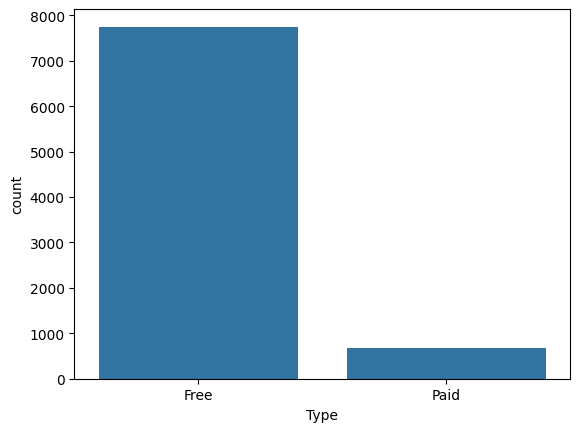

In [104]:
sns.countplot(x = df["Type"])

In [110]:
df["Content Rating"].value_counts(normalize=True) *100

,proportion
Content Rating,
Everyone,82.036993
Teen,10.647380
Mature 17+,4.031302
Everyone 10+,3.236898
Adults only 18+,0.023714
Unrated,0.023714


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

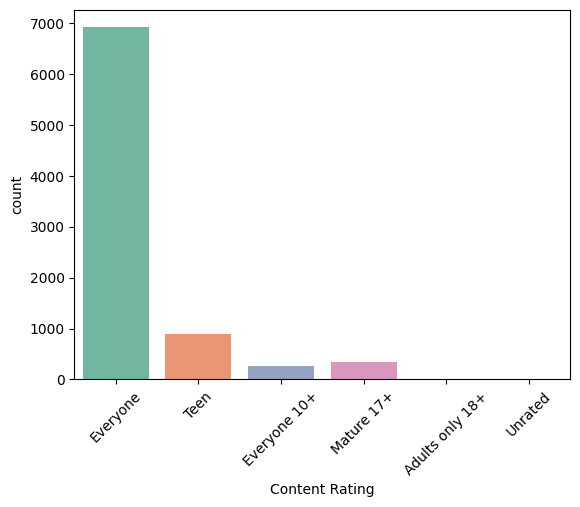

In [111]:
sns.countplot(x = df["Content Rating"] , palette = "Set2")
plt.xticks(rotation =45)

<Axes: ylabel='count'>

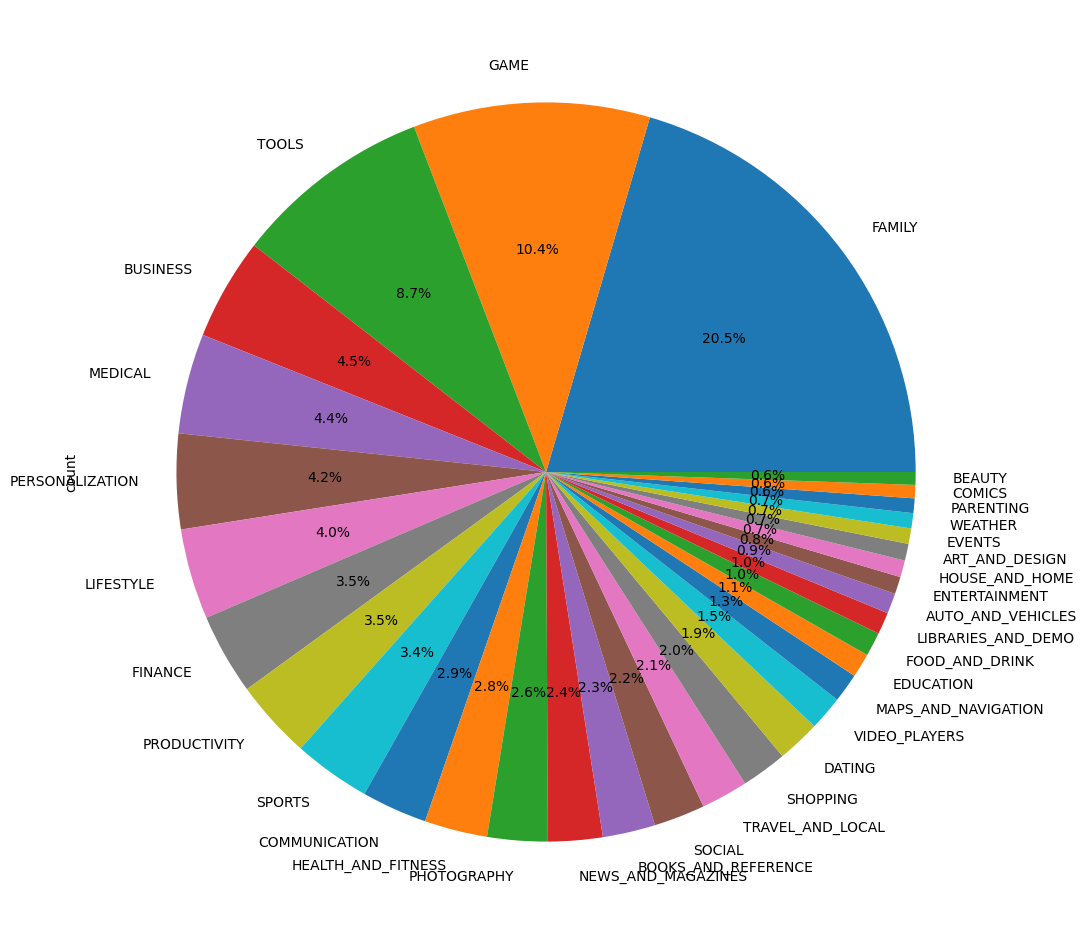

In [138]:
df["Category"].value_counts().plot.pie(y = df["Category"], figsize = (12, 12), autopct = '%1.1f%%')

In [156]:
cat = df["Category"].value_counts()
cat

,count
Category,
FAMILY,1726
GAME,873
TOOLS,732
BUSINESS,376
MEDICAL,369
PERSONALIZATION,351
LIFESTYLE,334
FINANCE,299
PRODUCTIVITY,291


In [157]:
category = cat.reset_index()
category.columns = ["Groups", "count"]
category

,Groups,count
0,FAMILY,1726
1,GAME,873
2,TOOLS,732
3,BUSINESS,376
4,MEDICAL,369
5,PERSONALIZATION,351
6,LIFESTYLE,334
7,FINANCE,299
8,PRODUCTIVITY,291
9,SPORTS,285


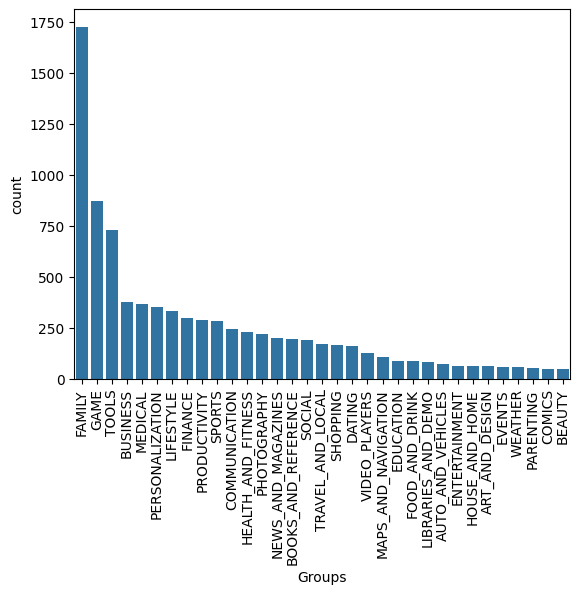

In [160]:
sns.barplot(category, x = category['Groups'], y = category['count'])
plt.xticks(rotation =90)
plt.show()

In [112]:
numerical_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [136]:
df['Price'].unique()
df['Price'].value_counts()
df['Price'].value_counts().sort_index()


,count
Price,
0.00,7749
0.99,142
1.00,3
1.04,1
1.20,1
...,...
379.99,1
389.99,1
394.99,1


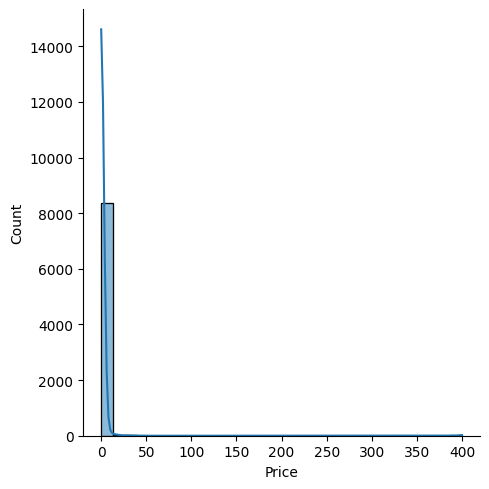

In [129]:
sns.displot(df["Price"] , kde=True ,bins=30)


In [137]:
df['Rating'].unique()
df['Rating'].value_counts()
df['Rating'].value_counts().sort_index()


,count
Rating,
1.0,16
1.2,1
1.4,3
1.5,3
1.6,4
1.7,8
1.8,8
1.9,10
2.0,11


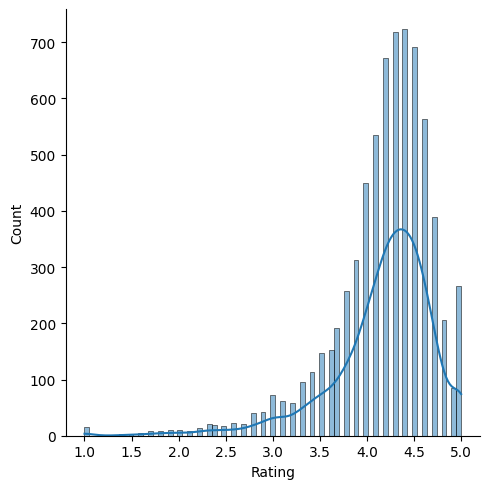

In [126]:
sns.displot(df["Rating"], kde = True)

In [162]:
df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()

,Category,Installs
0,GAME,11532464253
1,FAMILY,3552971425
2,TOOLS,2891094815
3,COMMUNICATION,1817943051
4,PHOTOGRAPHY,1493897655
5,PRODUCTIVITY,1296312744
6,NEWS_AND_MAGAZINES,1191005650
7,PERSONALIZATION,895179772
8,VIDEO_PLAYERS,866767720
9,SPORTS,806349498


<Axes: ylabel='Rating'>

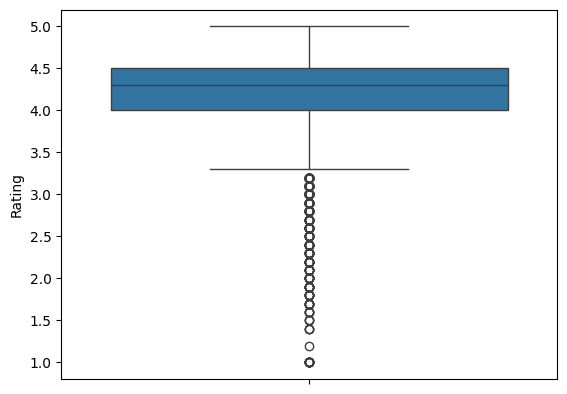

In [164]:
sns.boxplot(df['Rating'])

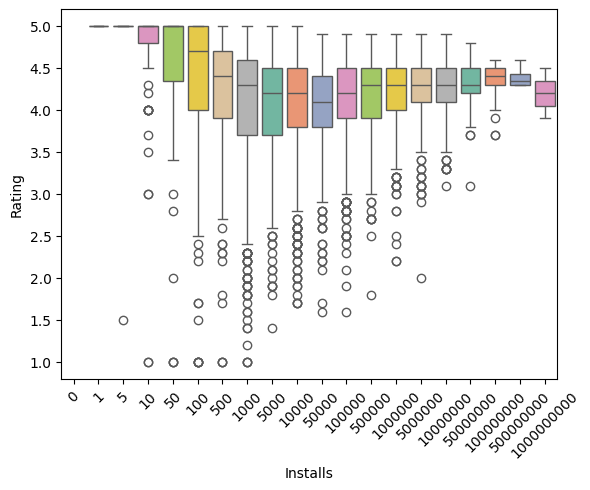

In [169]:
sns.boxplot(x = "Installs", y = "Rating", data = df,palette="Set2")
plt.xticks(rotation=45)
plt.show()